# Task 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree

# Loading the Dataset

In [4]:
df=pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


# Basic Understanding of the dataset

In [7]:
df.shape

(4119, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [9]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [10]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Data Cleaning and preprocessing

Handling Duplicated Values

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

# Extracting Numerical and Categorical Columns

In [14]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


In [15]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# Descriptive Statistical Analysis

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


# Data Visualization

Visualizing Numerical Columns using Histplot

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

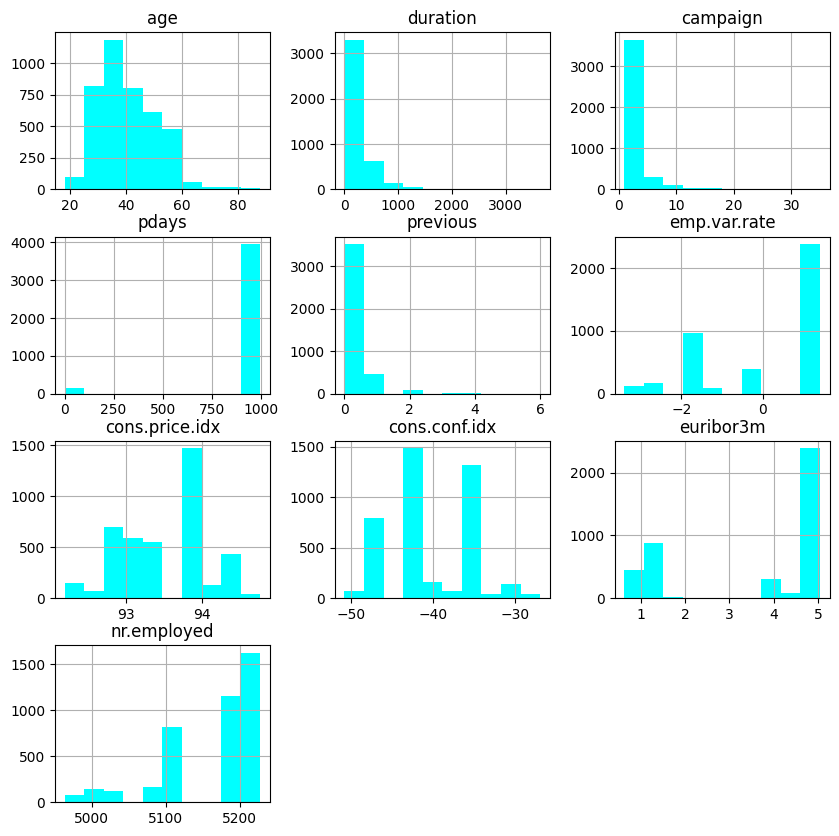

In [18]:
df.hist(figsize=(10,10), color='#00FFFF')

Visualizing Categorical Columns using Barplot

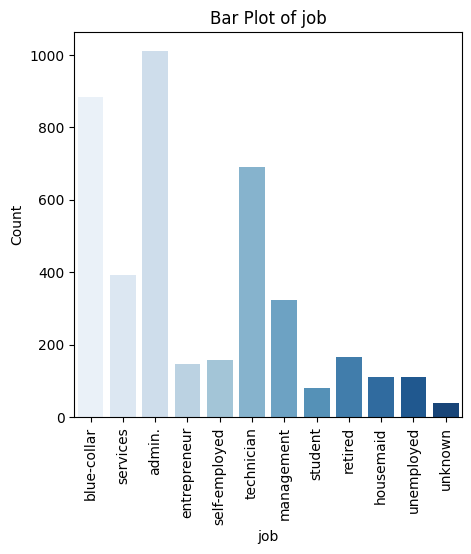

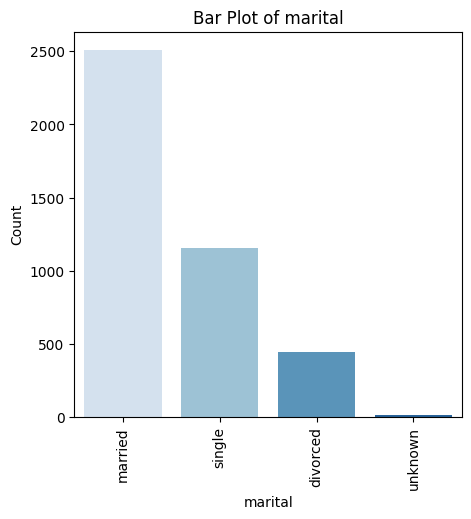

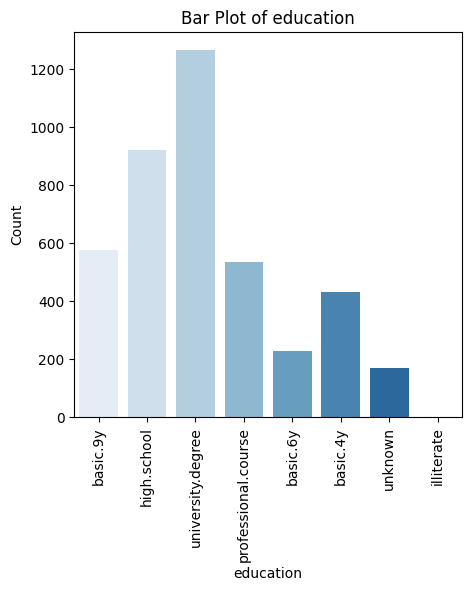

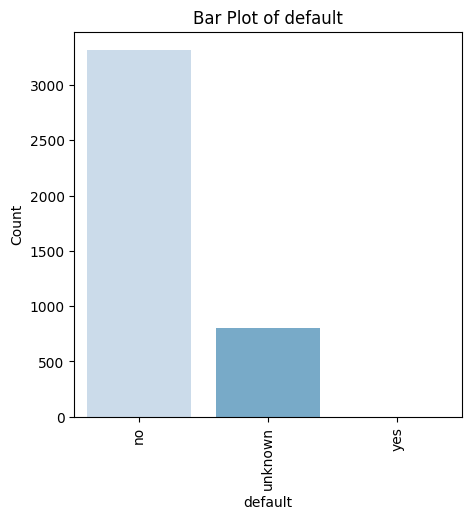

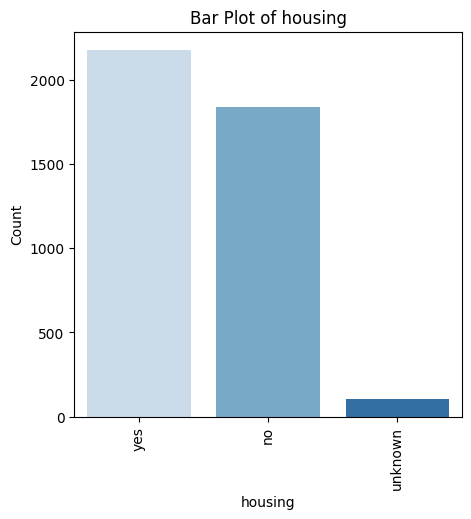

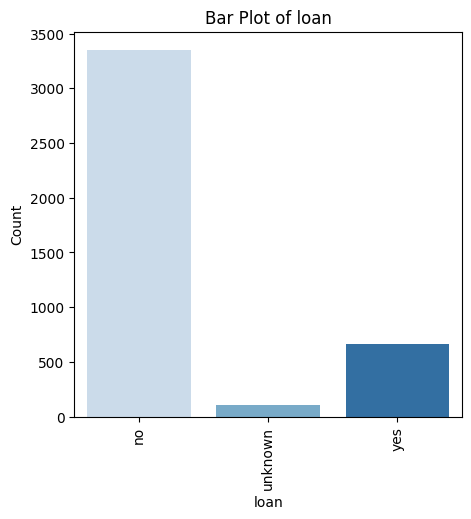

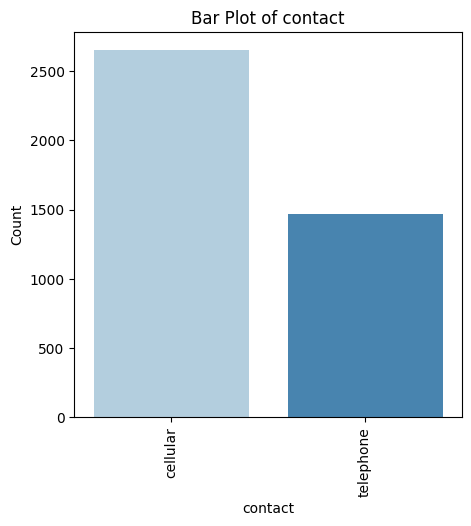

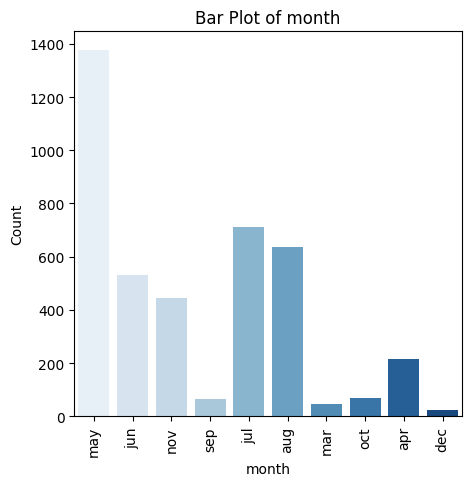

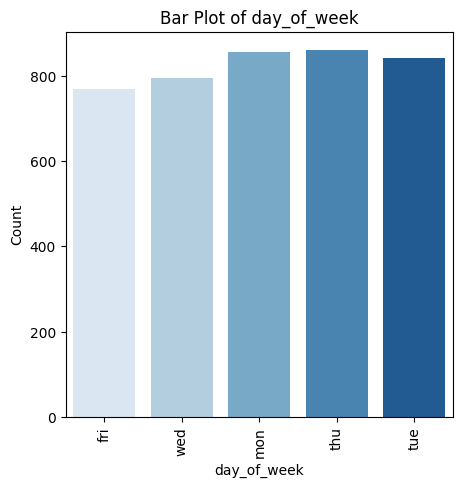

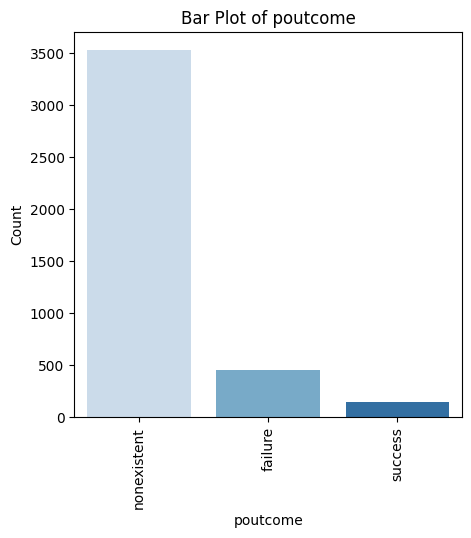

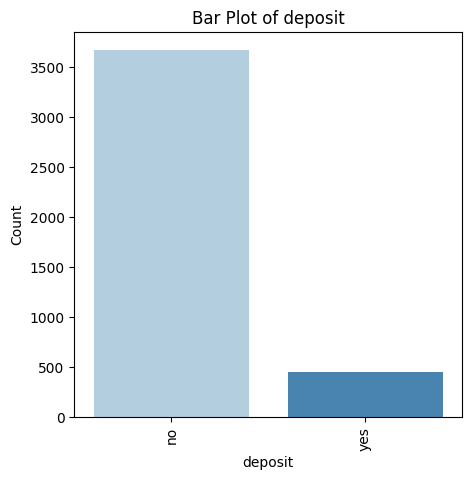

In [19]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=df, palette='Blues')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

Plotting Boxplot and Checking for Outliers

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

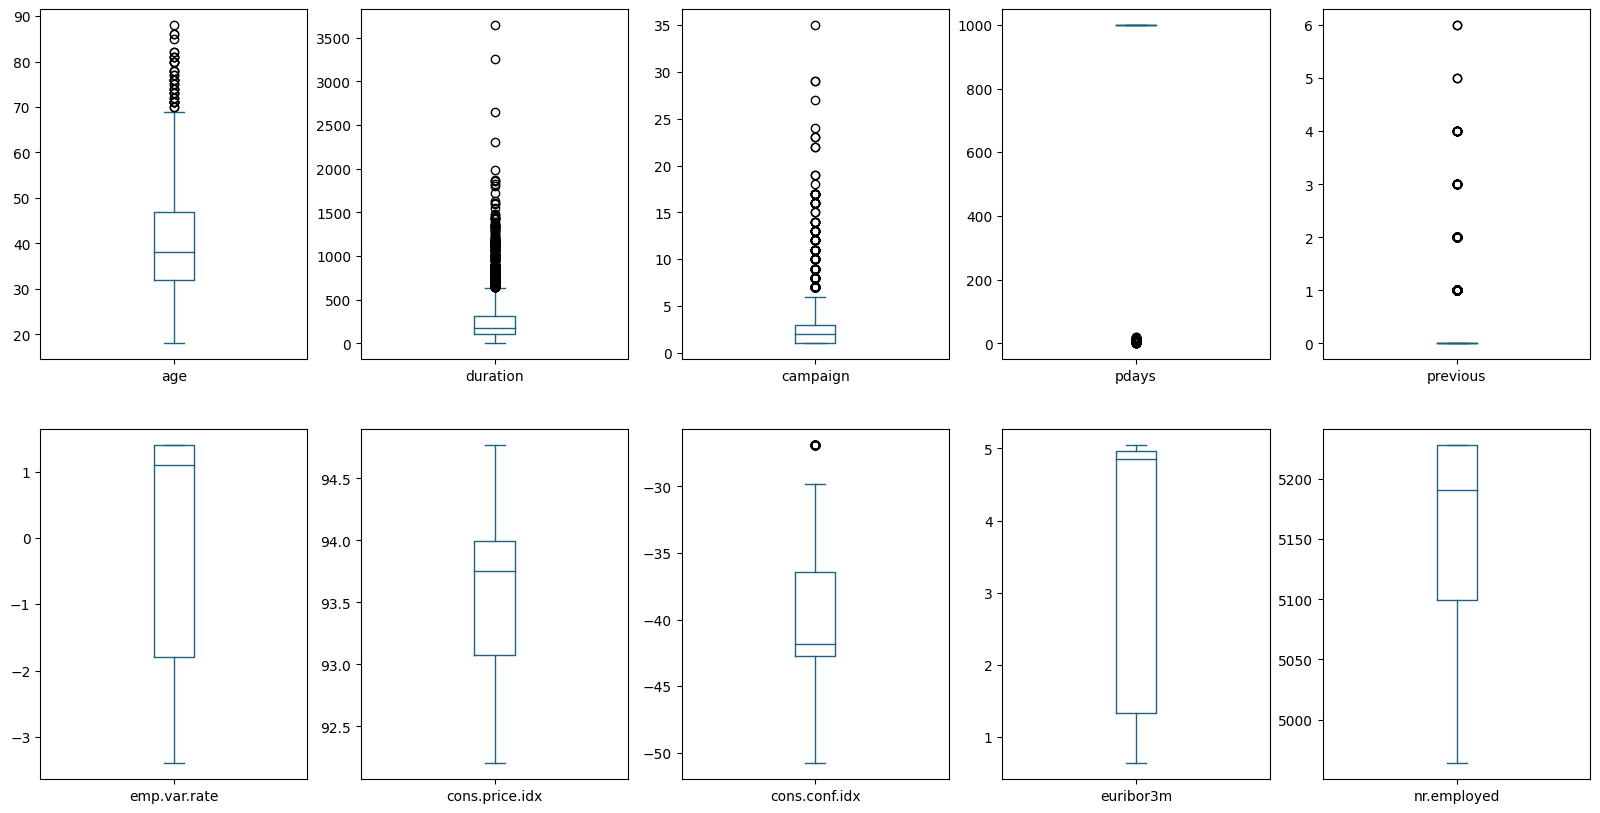

In [20]:
df.plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10),color='#1f6180')

Removing Outliers

In [21]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column,25)
q3 = np.percentile(column,75)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

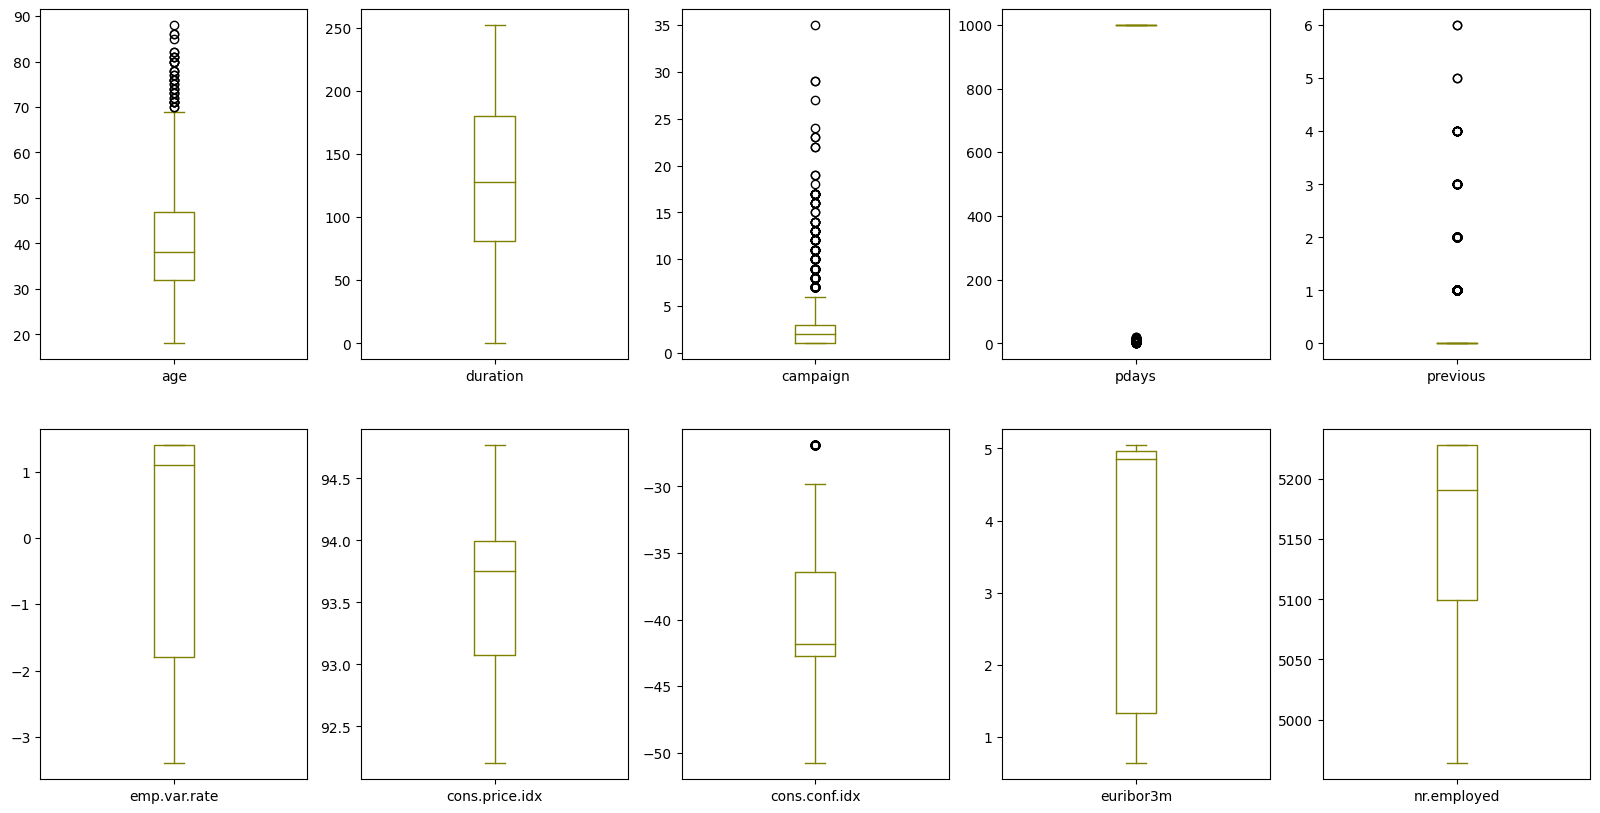

In [22]:
# Plotting Boxplot after removing outliers

df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10), color='#808000')

Checking for correlation using Correlation Plot

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.014048 -0.014169 -0.043425  0.050931   
duration        0.014048  1.000000 -0.218111 -0.093694  0.094206   
campaign       -0.014169 -0.218111  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.093694  0.058742  1.000000 -0.587941   
previous        0.050931  0.094206 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.063870  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482 -0.013338  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135  0.045889  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.067815  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.097339  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.063870       -0.013338       0.045889  -0.067815   
campaign            0.176079 

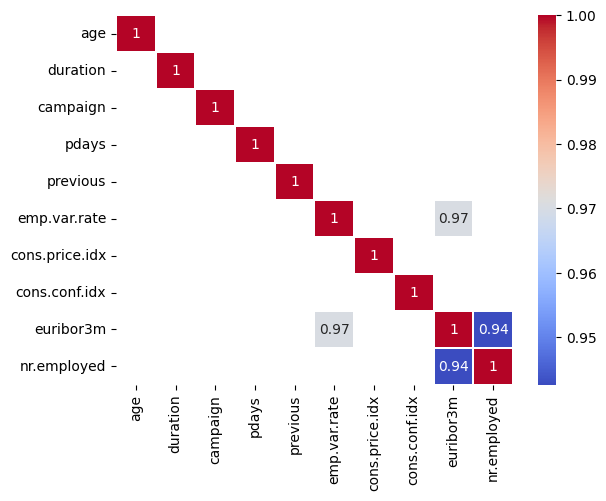

In [23]:
corr=df.corr()
print(corr)
corr=corr[abs(corr)>=0.90]
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.2)
plt.show()

# Feature Selection using Correlation

In [24]:
high_corr_cols=['emp.var.rate','euribor3m','nr.employed']

In [25]:
# copy the original dataframe

df1=df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [26]:
# Removing high correlated columns from the dataset

df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [27]:
# updated dimensions

df1.shape

(4119, 18)

Label Encoding

In [28]:
# conversion of categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_encoded=df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,250,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,250,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,250,0,20,0,1,13,17,0


Checking for target variable

In [29]:
df_encoded['deposit'].value_counts()

0    3668
1     451
Name: deposit, dtype: int64

Selecting Independent and Dependent Variables

In [30]:
x=df_encoded.iloc[:,:-1]    #independent variables
y=df_encoded.iloc[:,-1]     #dependent variable
print(x.shape)
print(y.shape)

(4119, 17)
(4119,)


# Splitting the dataset into training and testing datasets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dc=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

Evaluating Training and Testing Accuracy

In [36]:
print(dc.score(x_train,y_train))
print(dc.score(x_test,y_test))

0.9148591777274199
0.8990291262135922


Prediction

In [37]:
y_pred=dc.predict(x_test)
print(y_pred)

[0 0 1 ... 0 0 0]


# Evaluating Prediction Accuracy

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [39]:
print(accuracy_score(y_test,y_pred))

0.8990291262135922


In [40]:
print(confusion_matrix(y_test,y_pred))

[[905  25]
 [ 79  21]]


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       930
           1       0.46      0.21      0.29       100

    accuracy                           0.90      1030
   macro avg       0.69      0.59      0.62      1030
weighted avg       0.87      0.90      0.88      1030



# Plot Decision Tree

In [42]:
from sklearn.tree import plot_tree

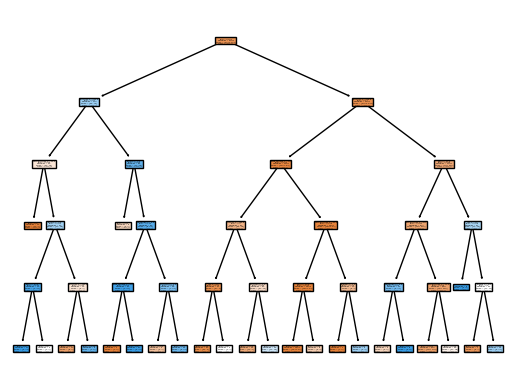

In [43]:
feature_names=df.columns.tolist()
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# Decision Tree 2 (using entropy)

Building Decision Tree Classifier Model 2

In [44]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [45]:
# evaluating training and testing accuracy
print(dc1.score(x_train,y_train))
print(dc1.score(x_test,y_test))

0.9080608611201036
0.9048543689320389


In [46]:
# prediction
y1_pred=dc1.predict(x_test)
print(y1_pred)

[0 0 1 ... 0 0 0]


In [47]:
# evaluating the model - accuracy, confusion matrix, classification report
print(accuracy_score(y_test,y1_pred))

0.9048543689320389


In [48]:
print(confusion_matrix(y_test,y1_pred))

[[915  15]
 [ 83  17]]


In [49]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.53      0.17      0.26       100

    accuracy                           0.90      1030
   macro avg       0.72      0.58      0.60      1030
weighted avg       0.88      0.90      0.88      1030



In [50]:
# cn = class names , fn = feature names
cn=['no','yes']
fn=x_train.columns
print(cn)
print(fn)

['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


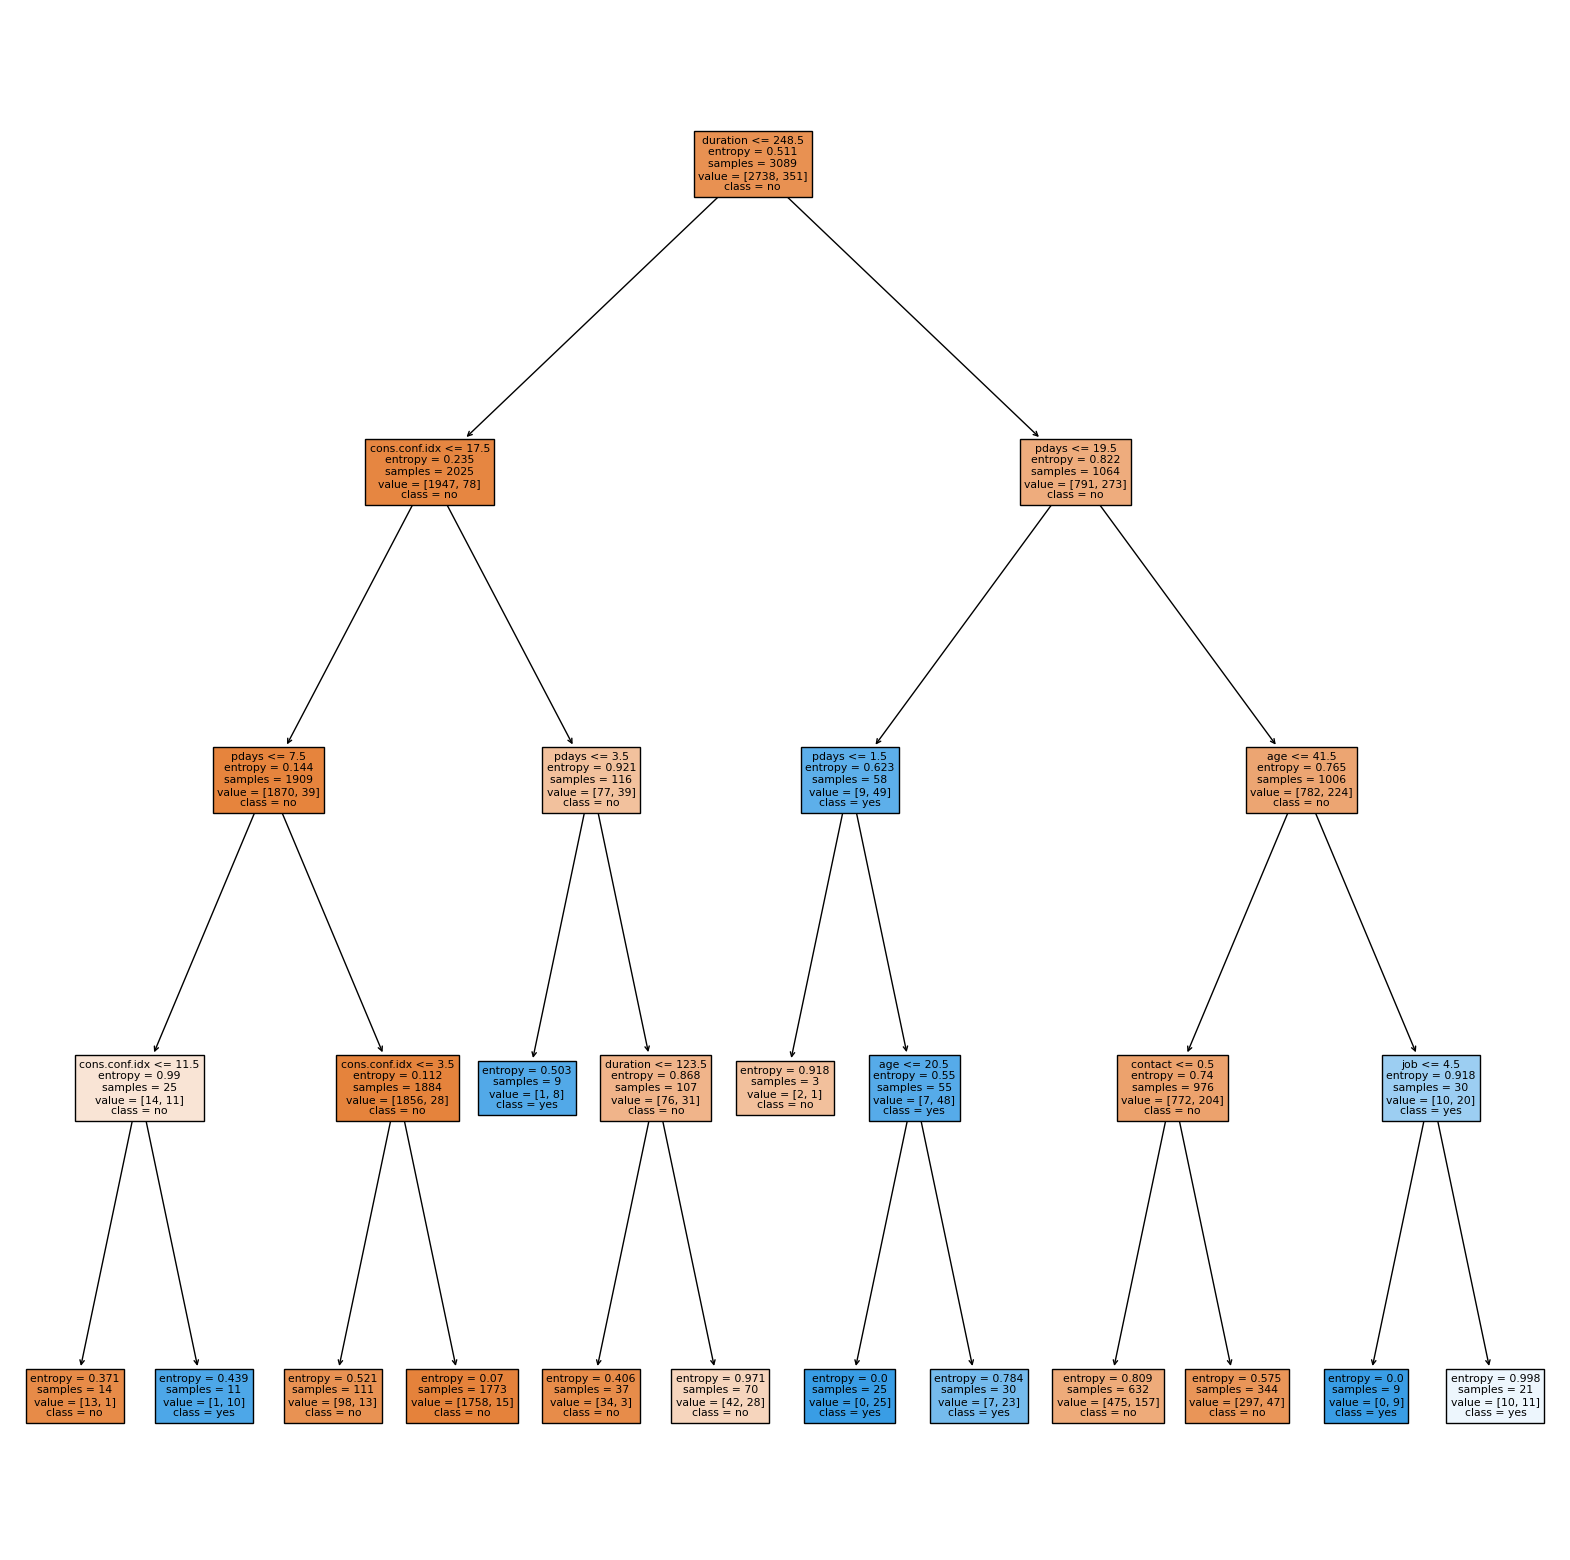

In [51]:
plt.figure(figsize=(20,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True)
plt.show()